# 🎶 Music Genre Classification  
*Using Tabular Features from GTZAN Dataset*  
Author: Joshua Chong

# 📂 Dataset Description  

**Dataset:** 🎵 GTZAN Genre Collection (available on Kaggle)  
- Contains **1000 audio tracks** in `.wav` format  
- Each track is **30 seconds long**  
- Covers **10 music genres** (100 tracks per genre)  

---

## 🔧 Approach  
We extract musical features such as:  
- 🎶 **MFCC (Mel-Frequency Cepstral Coefficients)**  
- 🎹 **Chroma features**  
- ⏱ **Tempo**  
- 🎵 Additional attributes like **key** and **loudness**  

These features are then used as input for machine learning classifiers:  
- 📊 **Support Vector Machine (SVM)**  
- 🌲 **Random Forest (RF)**  

---

## 🎯 Goal  
Achieve **high classification accuracy** in predicting the correct genre across different machine learning classifiers.

Librosa: extracts music/audio features

NumPy: numeical arrays

Pandas: manage data in a DataFrame

scikit-learn: typical machine learning library

In [1]:
#import all necessary libraries
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#import the data folder
from google.colab import drive
drive.mount('/content/drive')
DATA_SET_PATH = '/content/drive/MyDrive/Personal_Projects/music_class'

Mounted at /content/drive


#🔧 Data Preprocessing

In [3]:
#print head of data to analyse
df_30 = pd.read_csv(f"{DATA_SET_PATH}/features_30_sec.csv")
df_3 = pd.read_csv(f"{DATA_SET_PATH}/features_3_sec.csv")
df_30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df_3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
print(df_30.shape)
print(df_3.shape)

(1000, 60)
(9990, 60)


In [6]:
#extract features as features for x axis, label as y axis
X = df_30.drop(columns=['label', 'filename'])
y = df_30['label']

In [7]:
#split the data for training and testing, stratify so that all genres are equally represented
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
#scale the features to ensure that all features are equally accounted for the labelling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#conduct the machine learning using various methods such as logistic regression, SVM and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Logistic Regression
log_reg = LogisticRegression(max_iter = 500)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

#SVM
svm = SVC(kernel="linear")
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [10]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.74
SVM Accuracy: 0.68
Random Forest Accuracy: 0.775

Random Forest Classification Report:
              precision    recall  f1-score   support

       blues       0.79      0.75      0.77        20
   classical       0.86      0.95      0.90        20
     country       0.71      0.75      0.73        20
       disco       0.71      0.60      0.65        20
      hiphop       0.65      0.75      0.70        20
        jazz       0.77      0.85      0.81        20
       metal       0.89      0.85      0.87        20
         pop       0.86      0.90      0.88        20
      reggae       0.76      0.80      0.78        20
        rock       0.73      0.55      0.63        20

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.77      0.78      0.77       200



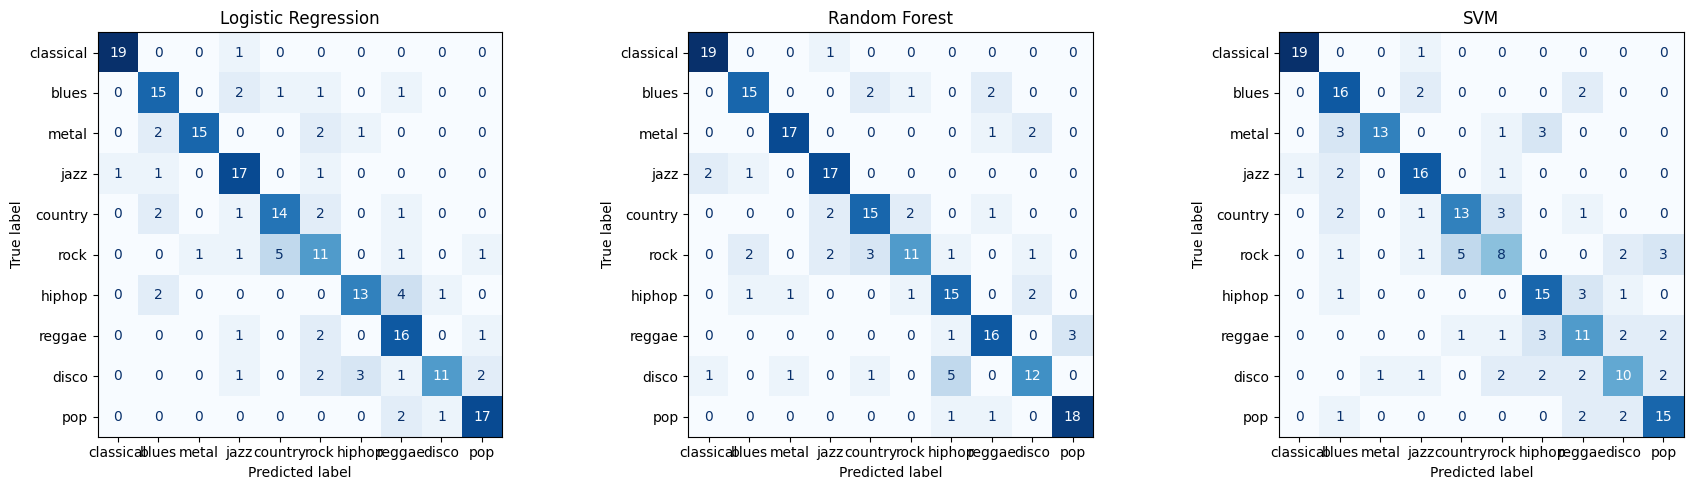

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have predictions for each model
# Replace these with your actual prediction variables
y_pred_logreg = log_reg.predict(X_test_scaled) # Use scaled data for log_reg
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test_scaled) # Use scaled data for svm

models = {
    "Logistic Regression": y_pred_logreg,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

# Get unique labels from the target variable
labels = y_test.unique()

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred, labels=labels) # Pass unique labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) # Pass unique labels
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

# 🎶 Model Performance Insights  

From our analysis, the **🌲 Random Forest classifier** consistently outperformed the other models, making it the most reliable choice for music genre classification. Therefore, we will adopt **Random Forest** as our final model for deployment.  

---

## 🔍 Key Observations  

- 🎼 **Classical Music**  
  Achieved **19/20 correct predictions** across all three methods — the highest consistency.  

- 🎸 **Rock** & 💃 **Disco**  
  Proved more challenging, with **≤ 12 correct predictions** across all models.  
  > ⚠️ This suggests potential overlap in feature representation or the need for further feature engineering.  

---

✅ With the final model established, we can now move forward to build a **prediction function** that classifies new, unseen audio files into their respective genres.  


In [15]:
import joblib
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf, "genre_rf.pkl")

['genre_rf.pkl']

Now, we test the machine learning model using our own wav files.

In [16]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
y, sr = librosa.load(file_name, duration=30.0)
print(file_name, sr)

Saving Freerolling_source_3262997.wav to Freerolling_source_3262997.wav
Freerolling_source_3262997.wav 22050


In [17]:
import numpy as np
import librosa

def extract_features(y, sr):
    features = {}

    # length
    features['length'] = len(y)

    # chroma_stft
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    features['chroma_stft_mean'] = float(np.mean(chroma_stft))
    features['chroma_stft_var'] = float(np.var(chroma_stft))

    # rms
    rms = librosa.feature.rms(y=y)
    features['rms_mean'] = float(np.mean(rms))
    features['rms_var'] = float(np.var(rms))

    # spectral_centroid
    spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['spectral_centroid_mean'] = float(np.mean(spec_centroid))
    features['spectral_centroid_var'] = float(np.var(spec_centroid))

    # spectral_bandwidth
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features['spectral_bandwidth_mean'] = float(np.mean(spec_bw))
    features['spectral_bandwidth_var'] = float(np.var(spec_bw))

    # rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['rolloff_mean'] = float(np.mean(rolloff))
    features['rolloff_var'] = float(np.var(rolloff))

    # zero_crossing_rate
    zcr = librosa.feature.zero_crossing_rate(y)
    features['zero_crossing_rate_mean'] = float(np.mean(zcr))
    features['zero_crossing_rate_var'] = float(np.var(zcr))

    # harmony (tonnetz has 6 dimensions → take mean & var of each)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    features['harmony_mean'] = float(np.mean(tonnetz))
    features['harmony_var'] = float(np.var(tonnetz))

    # perceptr (onset strength, 1D array)
    perceptr = librosa.onset.onset_strength(y=y, sr=sr)
    features['perceptr_mean'] = float(np.mean(perceptr))
    features['perceptr_var'] = float(np.var(perceptr))

    # tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features['tempo'] = float(tempo.item())

    # mfccs (1–20)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(1, 21):
        features[f'mfcc{i}_mean'] = float(np.mean(mfccs[i-1]))
        features[f'mfcc{i}_var'] = float(np.var(mfccs[i-1]))

    return features

In [20]:
import warnings
warnings.filterwarnings('ignore')

#change from dictionary to array as scaler expects an array with 58 features
features = extract_features(y, sr)
columns = [c for c in df_30.columns if c not in ['filename', 'label']]
feature_array = np.array([features[col] for col in columns], dtype=float)

#load scaler and model
joblib.load("scaler.pkl")
model = joblib.load("genre_rf.pkl")

#scale model
feature_scaled = scaler.transform([feature_array])

#final output
print(f"File name: {file_name}")
print(f"Predicted Genre: {model.predict(feature_scaled)[0]}")

File name: Freerolling_source_3262997.wav
Predicted Genre: jazz


In [21]:
!git clone https://github.com/joshua-chong/music-genre-classification-tabular.git


Cloning into 'music-genre-classification-tabular'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.




---

